# Stochastic simulation helps you grasp concepts of statistics
## Dr. Tirthajyoti Sarkar ([LinkedIn](https://www.linkedin.com/in/tirthajyoti-sarkar-2127aa7/), [Github](https://github.com/tirthajyoti)), Fremont, CA, July 2020

---

## Simulation helps distilling concepts
### Grasping statistic concepts can be hard
Do you find grasping the concepts of statistical analysis - law of large numbers, expectation value, confidence interval, p-value - somewhat difficult and troublesome?

You are not alone.

Our human brain and psyche have not evolved to deal with rigorous statistical methods. In fact, [a study](https://www.sciencedaily.com/releases/2018/10/181012082713.htm) of why people struggle to solve statistical problems reveals a preference for complicated rather than simpler, more intuitive solutions - which often leads to failure in solving the problem altogether.

We are good with a small set of numbers. The short-term working memory of the human brain is around [7–8 items/numbers](https://human-memory.net/short-term-working-memory/).

Therefore, whenever a process presents itself with a scale of thousands or millions, we tend to lose our grasp on the 'inherent nature' of that process. The laws and patterns, which are only manifested at the limit of large numbers, seem random and meaningless to us.

Statistics deals with large numbers and almost all theories and results in the statistical modeling and analysis are valid at the limit of large numbers only.

![frustrated-at-stat](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/Frustrated-at-stat.png)

### Data science/Machine learning is rooted in statistics - what to do?
In this era of data science and machine learning, where knowledge of the core statistical concepts are considered essential for success in those fields, this can be worrisome for data science practitioners and folks who are on their path to learn the trade.

But do not despair. There is a surprisingly easy way to tackle this. And it is called 'simulation'. In particular, discrete, stochastic, event-based simulation.

## Let me show you the simplest possible example

![dice](https://cdn.pixabay.com/photo/2016/09/08/18/45/cube-1655118_1280.jpg)

Suppose we are throwing a (fair) dice with 6 possible faces - 1 to 6. This event of the dice face taking up a value from the set {1,2,3,4,5,6} is represented by a random variable. In a formal setting, the so-called 'expectation value' (denoted by $\text{E}[X]$) of any  random variable $X$ is given by,

where $f(x)$ is the probability distribution function (PDF) or probability mass function (PMF) for $X$ i.e. the mathematical function that describes the distribution of the possible values that $X$ can assume.

For a dice throwing situation, the random variable $X$ is of discrete nature i.e. it can assume discrete values only, so it has a PMF (and not a PDF). And it is a very simple PMF,

$$f(x) = \frac{1}{6}$$

This is because the random variable has a 'uniform probability distribution' over the sample space {1,2,3,4,5,6} i.e. any dice throw can result in any one of these values, completely randomly, and without any bias towards any particular value. Therefore, the expected value is,

$$\text{E}[X] = \sum_{x}x.f(x) = \frac{1}{6}.(1+2+3+4+5+6)=\frac{21}{6}=3.5$$

So, as per theory, this is the expected value of the dice throwing process.

**Is it the most probable value?** No. Because a dice does not even have a face with 3.5! So, what's the meaning of this quantity?

**Is it some kind of probability**? No. Because the value is clearly greater than 1 and probability values are always between 0 and 1.

**Does it mean we can expect the face to turn up either 3 or 4 most times (3.5 is the average of 3 and 4)?** No. Because the PMF tells us that all the faces are equally likely to turn up.

Fortunately, the answer is provided by a fundamental tenet of statistics - The Law of large numbers - which says that, in the long run, the expected value is simply the average of all the values that the random variable will take.

Notice the phrase "_in the long run_". How do we verify this? Can we simulate such a scenario?

Sure we can. Simple Python code can help us simulate the scenario and verify the Law of Large Numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import mean

### The `dice` array and a simple dice-throwing function

In [2]:
dice = np.array([1,2,3,4,5,6])

def dice_throw(dice):
    """
    Simulates a single dice throw
    """
    return np.random.choice(dice)

### Throw the dice a few times

In [3]:
print("Here are 10 throws...")
for i in range(10):
    print(dice_throw(dice),end=',')
    
print("\n\nHere are 10 more throws...")
for i in range(10):
    print(dice_throw(dice),end=',')

Here are 10 throws...
3,3,5,1,3,2,3,1,2,6,

Here are 10 more throws...
3,6,4,2,3,3,5,2,6,3,

### Simulate for a long time

In [4]:
av = []
n_throws = []
for i in [5,10,15,20,25,50,75,100,150,200,250,500,750,1000]:
    throws = []
    for j in range(i):
        throws.append(dice_throw(dice)) 
    mean = np.array(throws).mean()
    av.append(mean)
    n_throws.append(i)

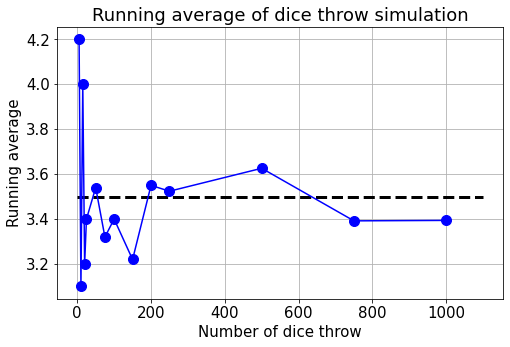

In [5]:
plt.figure(figsize=(8,5))
plt.title("Running average of dice throw simulation",fontsize=18)
plt.plot(n_throws,av,color='blue',marker='o',markersize=10)
plt.hlines(y=3.5,xmin=0,xmax=1100,linestyle='--',lw=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of dice throw",fontsize=15)
plt.ylabel("Running average",fontsize=15)
plt.grid(True)
plt.show()

## Confidence interval

### Some essential definitions

***Population***: The whole collection of which we want to measure some property. We can (almost) never get enough data about the whole population. Therefore, we can never know the true values of population properties.

***Sample***: A fraction (subset) of data from the population, which we can gather, and which helps us estimate the properties of the population. Because we cannot measure the true values of the population properties, we can only estimate them. This is the central job of statisticians.

***Statistic***: A statistic is a function of a sample. It is a random variable because every time you take a new sample (from the same population) you will get a new value for the statistic. Examples are the sample mean or the sample variance. These are good (unbiased) estimates of the population.

$$\bar{X_n} = \frac{1}{n}\sum_{i=1}^{i=n}X_i, \ \ S_n=\frac{1}{n-1}\sum_{i=1}^{i=n}(X_i-\bar{X_n})^2$$

### Confidence interval

A range/bound around the statistic (of our choice). We need this min/max bound to quantify the uncertainty of the random nature of our sampling. Let's clarify this further with the example of the confidence interval for the mean.

Depending on where and how we are drawing the sample, we may get a good representation of the population or not. So, if we **repeat the process of drawing the sample many times**, in some cases the sample will contain the true mean of the population, and in other cases, it will miss it. 

**Can we say anything about the proportion of our success in drawing a sample which contains the true mean**? 

The answer to this question is found in the confidence interval. If some assumptions are met, then we can calculate the confidence interval that will contain the true mean (when we sample a large number of times) with a certain fraction.

The necessary formulas are given below. We won't get into details about this formula or why the particular t-distribution is used in this equation. Readers can refer to any undergraduate level stats text or excellent online resources to understand the rationale.

<br>

<img src="https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/Conf_interval.png" width=600 height=420></img>

**Source**: https://psu.instructure.com/courses/1844486/pages/chapter-3-confidence-intervals

<br>
Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence. 

This is *__different__* than having a 95% probability that the true population proportion is within our confidence interval. Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

The equation to create a confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The _Standard Error_ is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Therefore, the $(1-\alpha)$% C.I. (**C**onfidence **I**nterval) is given by,

$$ C.I. = \bar{X_n} \pm t_{\alpha,n-1}*\frac{S_n}{\sqrt{n}} $$

where,

$\bar{X_n} = \text{sample mean}$, $S_n = \text{sample standard dev}$, $n = \text{number of samples}$, $t_{\alpha,n-1}$ is the t-statistic for parameter $\alpha$ and degrees of freedom $(n-1)$.

### What is the practical utility?
Be careful about the definition and the process to understand the true practical utility of the confidence interval.

When you are calculating a 95% confidence interval of mean, you are not calculating any probability (0.95 or otherwise). You are calculating two specific numbers (min and max bounds around the sample mean) which creates a range of values that will contain the true population mean (unknown) if we were to repeat the process.
Here lies the practical utility. We are not repeating the process. We are just drawing the sample once and constructing this range.

If we could repeat the process a million times, we would be able to verify the claim that the true mean lies inside this range in 95% cases.

But sampling a million times can be quite expensive and downright impossible in real life. So, the theoretical calculation of the confidence interval provides us with the min/max range, just from one draw of the sample. This is amazing, isn't it?

### But in the simulation, we can experiment a million times!
Yes, simulation is fantastic. We can repeat the sampling process a million times and verify the claim that our theoretical confidence interval truly contains the population mean, approximate 95% of the time.

Let's verify it using a real-life example of factory production. Let's say in a factory, a certain machine produces 20 tons of product on average, with a standard deviation of 5 tons. These are the true population mean and standard deviation. So, we can write simple Python code to generate a typical production run over a year (52 weeks) and plot it.

In [6]:
num_weeks = 52
production = np.random.normal(loc=20,scale=5,size=num_weeks)

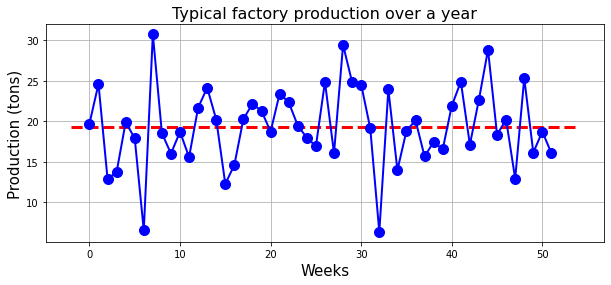

In [7]:
plt.figure(figsize=(10,4))
plt.title("Typical factory production over a year",fontsize=16)
plt.plot(production,c='blue',lw=2,marker='o',markersize=10)
plt.grid(True)
plt.xlabel("Weeks",fontsize=15)
plt.ylabel("Production (tons)",fontsize=15)
plt.hlines(y=production.mean(),xmin=-2,xmax=54,color='red',linestyle='--',lw=3)
plt.show()

### Sample mean

In [8]:
n = len(production)
m = production.mean()

### Sample standard deviation

In [9]:
production.std()

4.919252299560373

### Sample standard error

In [10]:
std_err=production.std()/np.sqrt(n)
print(std_err)

0.6821775539618872


### 90% confidence interval

In [11]:
confidence = 0.9
h = std_err * stats.t.ppf((1 + confidence) / 2, n)
i90 =[m-h,m+h]
print("90% confidence interval of mean from ",m-h," to ",m+h)

90% confidence interval of mean from  18.19130937896271  to  20.47618007932221


### 99% confidence interval

In [12]:
confidence = 0.99
h = std_err * stats.t.ppf((1 + confidence) / 2, n)
i99 =[m-h,m+h]
print("99% confidence interval of mean from ",m-h," to ",m+h)

99% confidence interval of mean from  17.509783661041904  to  21.157705797243015


In [13]:
i90[0],i90[1]

(18.19130937896271, 20.47618007932221)

In [14]:
i99[0],i99[1]

(17.509783661041904, 21.157705797243015)

### Repeat the random process many times

In [15]:
def repeat(n):
    """
    Simulates the factory run `n` number of times
    Counts the frequency where population mean (i.e. 20) is contained in the C.I.
    """
    interval_90_count = 0
    interval_99_count = 0
    num_weeks = 52
    
    for i in range(n):    
        production = np.random.normal(loc=20,scale=5,size=num_weeks)
        m = production.mean()
        std_err=production.std()/np.sqrt(num_weeks)
        # For 90% C.I. 
        confidence = 0.9
        h = std_err * stats.t.ppf((1 + confidence) / 2, num_weeks)
        if m-h <= 20 <= m+h:
            interval_90_count+=1
        # For 99% C.I.
        confidence = 0.99
        h = std_err * stats.t.ppf((1 + confidence) / 2, num_weeks)
        if m-h <= 20 <= m+h:
            interval_99_count+=1
    return (interval_90_count,interval_99_count)

In [16]:
repeatations = 10000
int_90,int_99 = repeat(repeatations)

In [17]:
round(int_90/repeatations,3)

0.898

In [18]:
round(int_99/repeatations,3)

0.99

## Summary and thoughts for simulation
In this notebook, we demonstrated the power of simulation to understand concepts of statistical estimation like expected value and confidence interval. In reality, we do not get the chance to repeat a statistical experiment thousands of times, but we can simulate the process on a computer, which helps us to distill down these concepts in a clear and intuitive manner.

Once you master the art of simulating a stochastic event, you can investigate the properties of the random variables and the esoteric statistical theory behind them, with a new weapon of analysis.

For example, you can investigate, using stochastic simulation,

- The convergence of the mean of many stochastic events to a Normal distribution (verifying the Central Limit Theorem by numerical experiment)
- Check what happens when you mix or transform many statistical distributions together in this way or that? what kind of resulting distributions do you get?
- If a stochastic event does not follow the theoretical assumptions, what kind of aberrant behavior you can get in the result? In this case, the simulation could be your only friend because the standard theory fails if the assumptions are not met.
- What kind of statistical properties emerges from the operation of a Deep Learning network?

For learning the foundational principles of data science and machine learning, the importance of these kinds of exercise cannot be emphasized enough.

![simulation-ds](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/Simulation-problems-DS.png)